# Modelo de embeddings - redes neuronales preentrenadas
# Word2Vec

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('dataset_final_actualizacion_mayus2.csv')
df

Periódico                                       Hipervínculo  \
0       ElDiario.es  https://www.eldiario.es/politica/pp-recupera-l...   
1       ElDiario.es  https://www.eldiario.es/politica/58-ciudadanos...   
2       ElDiario.es  https://www.eldiario.es/politica/diputado-ayus...   
3       ElDiario.es  https://www.eldiario.es/andalucia/almeria/psoe...   
4       ElDiario.es  https://www.eldiario.es/castilla-la-mancha/pol...   
...             ...                                                ...   
4974  HayNoticia.es  https://haynoticia.es/una-empresa-catalana-tri...   
4975  HayNoticia.es  https://haynoticia.es/hospitalizado-tras-inten...   
4976  HayNoticia.es  https://haynoticia.es/lleva-300-bolsas-de-plas...   
4977  HayNoticia.es  https://haynoticia.es/la-dgt-multara-a-los-con...   
4978  HayNoticia.es  https://haynoticia.es/una-sentencia-prohibe-a-...   

     Fecha publicación                                            Titular  \
0           2023-07-11  El PP se recupera ligeramente pero sigue sin o...   
1           2023-07-11  Un 58% de los ciudadanos critican los pactos c...   
2           2023-07-11  Un diputado de Ayuso reúne a un grupo de vícti...   
3           2023-07-11  El PSOE de Mójacar recurre ante el Constitucio...   
4           2023-07-11  La exalcaldesa de Toledo pide a Feijóo que fir...   
...                ...                                                ...   
4974        2018-11-06  Una empresa catalana triunfa con su papel higi...   
4975        2018-10-31  Hospitalizado tras intentar sacarse una muela ...   
4976        2018-10-30  Lleva 300 bolsas de plástico a Mercadona para ...   
4977        2018-10-28  La DGT multará a los conductores que no hayan ...   
4978        2018-10-25  Una Sentencia prohibe a los comercios poner vi...   

                                              Subtítulo  \
0     La estimación de escaños no se mueve en la enc...   
1     El 17,8% de quienes apuestan por Feijóo ven “m...   
2     Daniel Portero trata con urgencia de contrarre...   
3     Ya con nuevo alcalde del PP, los socialistas r...   
4     La socialista, también número dos al Congreso,...   
...                                                 ...   
4974                                                NaN   
4975                                                NaN   
4976                                                NaN   
4977                                                NaN   
4978                                                NaN   

                                                 Cuerpo           Categoría  \
0     El partido popular se recupera muy ligeramente...            politica   
1     El PP ha necesitado a Vox para recuperar buena...            politica   
2     El diputado del PP en la Asamblea de Madrid Da...            politica   
3     Mojácar retomó el ritmo político con la procla...           andalucia   
4     La exalcaldesa de Toledo y 'número dos' de la ...  castilla-la-mancha   
...                                                 ...                 ...   
4974  La empresa catalana Banys Nous de Barcelona es...        curiosidades   
4975  Sucedió el pasado lunes poco después de las 20...        curiosidades   
4976  Un joven ha sido noticia ayer tras presentarse...        curiosidades   
4977  Este domingo nos ha tocado hacer por segunda v...        curiosidades   
4978  Así se ha pronunciado la Audiencia Provincial ...        curiosidades   

      Target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
4974       1  
4975       1  
4976       1  
4977       1  
4978       1  

[4979 rows x 8 columns]

In [3]:
df.Target.value_counts()

0    2506
1    2473
Name: Target, dtype: int64

In [4]:
df["Texto"] = df.Titular + " " + df.Cuerpo
df.head()

Periódico                                       Hipervínculo  \
0  ElDiario.es  https://www.eldiario.es/politica/pp-recupera-l...   
1  ElDiario.es  https://www.eldiario.es/politica/58-ciudadanos...   
2  ElDiario.es  https://www.eldiario.es/politica/diputado-ayus...   
3  ElDiario.es  https://www.eldiario.es/andalucia/almeria/psoe...   
4  ElDiario.es  https://www.eldiario.es/castilla-la-mancha/pol...   

  Fecha publicación                                            Titular  \
0        2023-07-11  El PP se recupera ligeramente pero sigue sin o...   
1        2023-07-11  Un 58% de los ciudadanos critican los pactos c...   
2        2023-07-11  Un diputado de Ayuso reúne a un grupo de vícti...   
3        2023-07-11  El PSOE de Mójacar recurre ante el Constitucio...   
4        2023-07-11  La exalcaldesa de Toledo pide a Feijóo que fir...   

                                           Subtítulo  \
0  La estimación de escaños no se mueve en la enc...   
1  El 17,8% de quienes apuestan por Feijóo ven “m...   
2  Daniel Portero trata con urgencia de contrarre...   
3  Ya con nuevo alcalde del PP, los socialistas r...   
4  La socialista, también número dos al Congreso,...   

                                              Cuerpo           Categoría  \
0  El partido popular se recupera muy ligeramente...            politica   
1  El PP ha necesitado a Vox para recuperar buena...            politica   
2  El diputado del PP en la Asamblea de Madrid Da...            politica   
3  Mojácar retomó el ritmo político con la procla...           andalucia   
4  La exalcaldesa de Toledo y 'número dos' de la ...  castilla-la-mancha   

   Target                                              Texto  
0       0  El PP se recupera ligeramente pero sigue sin o...  
1       0  Un 58% de los ciudadanos critican los pactos c...  
2       0  Un diputado de Ayuso reúne a un grupo de vícti...  
3       0  El PSOE de Mójacar recurre ante el Constitucio...  
4       0  La exalcaldesa de Toledo pide a Feijóo que fir...

In [5]:
!pip install cython

In [6]:
# Pruebo a tokenizar un cuerpo de noticia a ver cómo sale
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
print(word_tokenize(df.iloc[0,:]["Cuerpo"]))

['El', 'partido', 'popular', 'se', 'recupera', 'muy', 'ligeramente', ',', 'pero', 'las', 'posiciones', 'de', 'cara', 'al', '23J', 'se', 'mantienen', 'sin', 'apenas', 'cambios', '.', 'Esa', 'era', 'la', 'foto', 'fija', 'este', 'lunes', ',', 'antes', 'del', "'cara", 'a', 'cara', "'", 'celebrado', 'en', 'Atresmedia', 'entre', 'Pedro', 'Sánchez', 'y', 'Alberto', 'Núñez', 'Feijóo', ':', 'el', 'tracking', 'de', 'Simple', 'Lógica', 'para', 'elDiario.es', ',', 'con', 'datos', 'recogidos', 'antes', 'del', 'debate', ',', 'señala', 'que', 'los', 'populares', 'apenas', 'lograban', 'distanciarse', 'mínimamente', 'del', 'PSOE', '.', 'Un', 'cambio', 'residual', 'que', 'no', 'tiene', 'efecto', 'en', 'el', 'reparto', 'de', 'diputados.El', 'tracking', 'estima', 'que', 'los', 'populares', 'ganarán', 'las', 'elecciones', 'generales', 'y', 'se', 'harán', 'el', '23J', 'con', 'el', '31,1', '%', 'de', 'los', 'votos', ',', 'dos', 'décimas', 'más', 'que', 'en', 'la', 'encuesta', 'del', 'lunes', '.', 'Eso', 'sí'

In [7]:
# ahora tokenizo sin tener en cuenta los signos de puntuación ni símbolos (para este modelo parece que tiene más sentido así)
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(df.iloc[0,:]["Cuerpo"]))

['El', 'partido', 'popular', 'se', 'recupera', 'muy', 'ligeramente', 'pero', 'las', 'posiciones', 'de', 'cara', 'al', '23J', 'se', 'mantienen', 'sin', 'apenas', 'cambios', 'Esa', 'era', 'la', 'foto', 'fija', 'este', 'lunes', 'antes', 'del', 'cara', 'a', 'cara', 'celebrado', 'en', 'Atresmedia', 'entre', 'Pedro', 'Sánchez', 'y', 'Alberto', 'Núñez', 'Feijóo', 'el', 'tracking', 'de', 'Simple', 'Lógica', 'para', 'elDiario', 'es', 'con', 'datos', 'recogidos', 'antes', 'del', 'debate', 'señala', 'que', 'los', 'populares', 'apenas', 'lograban', 'distanciarse', 'mínimamente', 'del', 'PSOE', 'Un', 'cambio', 'residual', 'que', 'no', 'tiene', 'efecto', 'en', 'el', 'reparto', 'de', 'diputados', 'El', 'tracking', 'estima', 'que', 'los', 'populares', 'ganarán', 'las', 'elecciones', 'generales', 'y', 'se', 'harán', 'el', '23J', 'con', 'el', '31', '1', 'de', 'los', 'votos', 'dos', 'décimas', 'más', 'que', 'en', 'la', 'encuesta', 'del', 'lunes', 'Eso', 'sí', 'la', 'subida', 'es', 'tan', 'pequeña', 'que'

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["Texto"], 
                                                  df["Target"], 
                                                  test_size=0.3, 
                                                  stratify=df["Target"],
                                                  random_state=42)

In [24]:
# Convierto las palabras de la columna "Texto" de las noticias del train en etiquetas
X_train_tagged = [TaggedDocument(words=tokenizer.tokenize(d.lower()), 
                              tags=[str(i)]) for i, d in enumerate(X_train)]

In [25]:
# Defino un modelo Doc2vec
model = Doc2Vec(vector_size=20,min_count=2,epochs=40)

In [26]:
model.build_vocab(tagged_data) # No sé si esto es necesario

In [27]:
tagged_data

[TaggedDocument(words=['juan', 'ayuso', 'carlos', 'rodríguez', 'juanpe', 'lópez', 'y', 'los', 'brotes', 'verdes', 'del', 'ciclismo', 'español', 'necesitamos', 'un', 'alcaraz', 'necesitamos', 'un', 'carlos', 'alcaraz', 'ayudaría', 'mucho', 'reflexiona', 'en', 'voz', 'alta', 'eduardo', 'chozas', 'lo', 'que', 'se', 'predica', 'en', 'los', 'mentideros', 'del', 'ciclismo', 'español', 'en', 'esta', 'sequía', 'tan', 'profunda', 'que', 'las', 'cuatro', 'gotas', 'que', 'suponen', 'el', 'rosa', 'de', 'juanpe', 'lópez', 'en', 'el', 'giro', 'se', 'reciben', 'con', 'optimismo', 'son', 'los', 'brotes', 'verdes', 'quizá', 'con', 'dos', 'nombres', 'como', 'dos', 'ilusiones', 'dos', 'veinteañeros', 'en', 'cuyas', 'espaldas', 'recae', 'todo', 'el', 'peso', 'de', 'la', 'tradición', 'nacional', 'son', 'juan', 'ayuso', 'barcelona', '22', 'y', 'carlos', 'rodríguez', 'almuñécar', '21', 'a', 'los', 'que', 'en', 'cada', 'pedalada', 'en', 'cada', 'gesto', 'en', 'cada', 'destello', 'se', 'les', 'rastrean', 'simi

In [28]:
# Creo una clase que me avisa de cada vez que acaban 10 épocas durante el entrenamiento
from gensim.models.callbacks import CallbackAny2Vec
class callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 1
    def on_epoch_end(self, model):
        if self.epoch % 10 == 0:
            print(f"Epoch {self.epoch} finished")
        self.epoch += 1

In [29]:
model.train(X_train_tagged,
            total_examples=model.corpus_count, 
            epochs=model.epochs,
            callbacks=[callback()])
print("Train finished")

Epoch 10 finished
Epoch 20 finished
Epoch 30 finished
Epoch 40 finished
Train finished


In [30]:
model.save("doc2vec_2.model")
print("Modelo Guardado")

Modelo Guardado


In [31]:
# número de noticias entrenadas del train
len(model.dv)

3485

In [41]:
# 20 vectores de cada noticia 
len(model.dv[0])

20

In [34]:
# cargo el modelo
model= Doc2Vec.load("doc2vec_2.model")


# X_test_tagged = [TaggedDocument(words=tokenizer.tokenize(d.lower()), 
                             # tags=[str(i)]) for i, d in enumerate(X_test)]


In [44]:
# creo vectores para los datos del test, no antes visto en el entrenamiento (no sé si se hace así)
X_test_vect=[]
for i in X_test:
    X_test_tagged = tokenizer.tokenize(i.lower())
    v = model.infer_vector(X_test_tagged)
    print("Vector inferido:", v)
    X_test_vect.append(v)

Vector inferido: [-2.653654   -2.630107    0.81010425 -0.5027508   2.3575978  -1.554814
 -0.094636    1.169354   -1.7718805   0.4871904  -0.78589886  1.4935817
  0.56307906  1.1702389   4.9054503   0.42904633 -1.1873215  -0.85591984
 -2.7554579   1.6658165 ]
Vector inferido: [ 4.038894   -0.08018857 -2.00621    -2.7401848  -0.8153499   1.0785874
 -0.8924501   1.1904665  -2.4696987   1.037807    1.943776   -1.5480652
 -1.8636832  -2.5837326   2.4738681   0.13037762  2.5402057  -1.7474996
  0.76067483 -3.0203307 ]
Vector inferido: [ 0.250559    0.5425952  -0.9957777  -1.8837001  -2.5741124   1.8256327
 -0.15403084  2.064807   -5.859262    0.97876155  3.0108664   1.3468077
  3.1315432  -1.364835   -0.01940172 -0.9452929   5.790633    0.16647884
 -3.2390034   3.345889  ]
Vector inferido: [-1.4840757   1.1287721  -1.6043414  -0.9269631   3.8042934  -2.5742674
 -0.9562833  -0.38303944 -1.4409542   0.14719519  1.9140788   0.37726247
  0.10049307  0.11774764  3.3143008  -2.6691794   0.24069223

In [45]:
# vectores de cada noticia del test
len(X_test_vect[0])

20

In [54]:
X_train_gensim = model.dv
X_train_gensim #Se me han guardado como un objeto 'gensim'

In [55]:
# Obtener los índices de las noticias y los vectores para pasarlo a un formato que pueda entrenar el modelo de predicción
news_indices = X_train_gensim.index_to_key
X_train_vect = [X_train_vect[news_idx] for news_idx in news_indices]

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_vect, y_train)
clf.predict(X_train_vect)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
# X_test_vect = vectorizer.transform(X_test)
y_pred = clf.predict(X_test_vect)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy Modelo LogisticRegression-W2V:", accuracy)
print("Classification Report:\n", report)

Accuracy Modelo LogisticRegression-W2V: 0.8534136546184738
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84       752
           1       0.79      0.96      0.87       742

    accuracy                           0.85      1494
   macro avg       0.87      0.85      0.85      1494
weighted avg       0.87      0.85      0.85      1494



In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Confusion Matrix


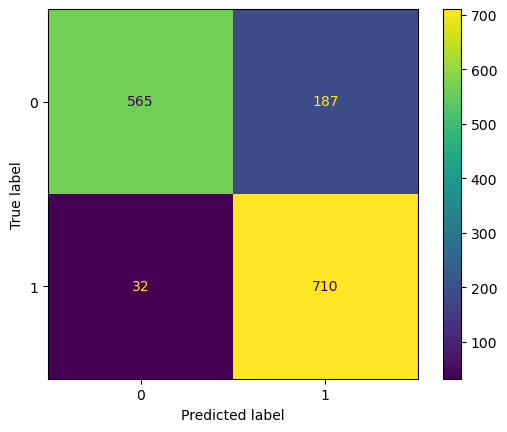

In [61]:
cfm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()